In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

In [129]:
df = pd.read_csv("../data/train.csv")
df2 = pd.read_csv("../data/test.csv")

In [130]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


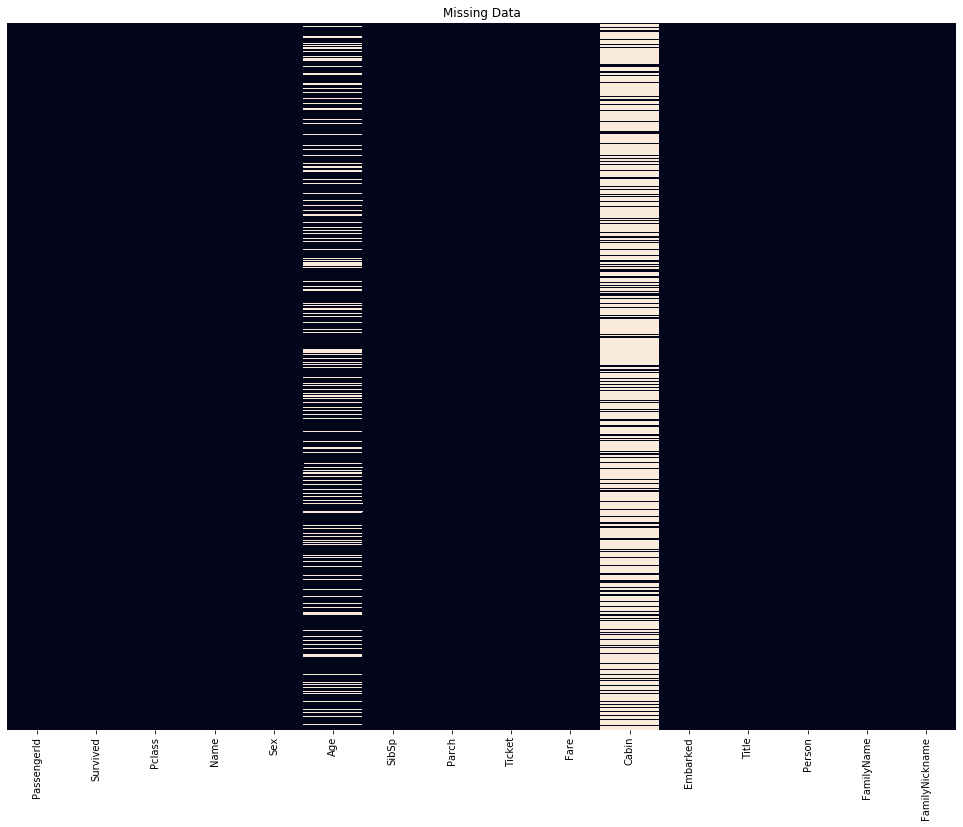

In [229]:
plt.figure(figsize=(17,13))
ax = sns.heatmap(df.isna(),cbar=False);
ax.set_yticks([]);
ax.set_title('Missing Data');

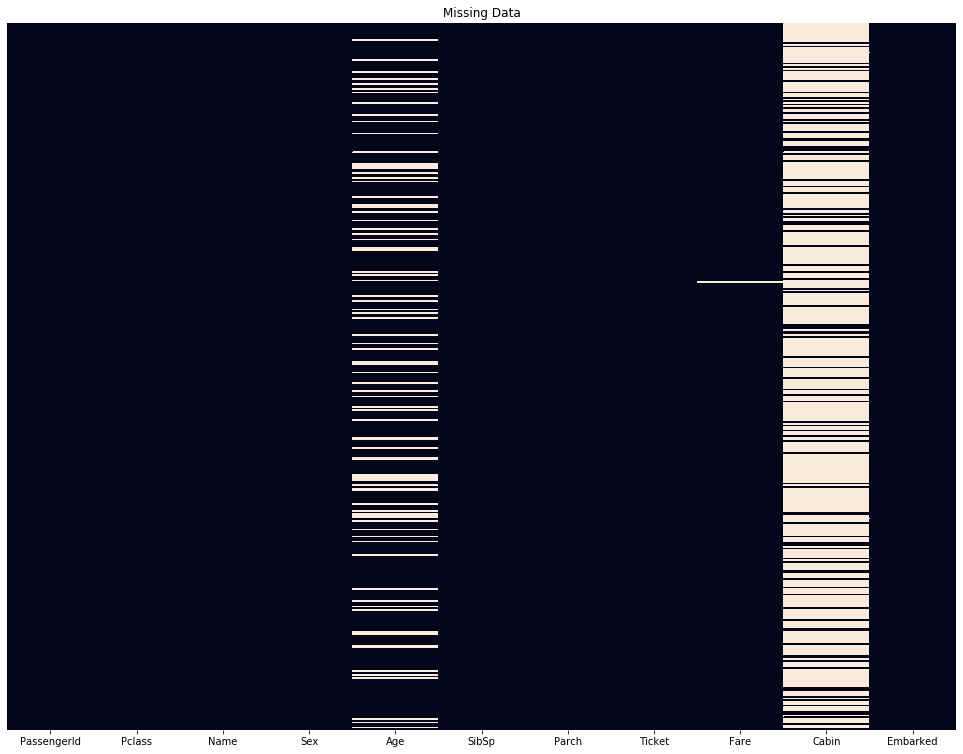

In [5]:
plt.figure(figsize=(17,13))
ax2 = sns.heatmap(df2.isna(),cbar=False);
ax2.set_yticks([]);
ax2.set_title('Missing Data');

In [131]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [132]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

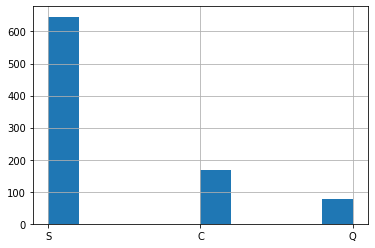

In [181]:
df['Embarked'].hist()

In [134]:
# Fills with mode where 'Embarked' equals NaN

df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

In [135]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [136]:
df.Fare.mode()

0    8.05
dtype: float64

In [137]:
classes = df.Pclass.unique()

In [138]:
classes.sort()
classes

array([1, 2, 3], dtype=int64)

In [139]:
class_fare = pd.DataFrame()
for clas in classes:
    class_fare[clas] = df[df.Pclass == clas].Fare.describe()
class_fare = class_fare.T
class_fare

,count,mean,std,min,25%,50%,75%,max
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [140]:
class_fare.loc[1, 'mean']

84.15468749999992

In [141]:
for i in df[df['Fare'].isna()].index:
    df.iloc[i, 8] = class_fare.loc[df.iloc[i, 1], 'mean']    

In [142]:
titulo = re.compile(r'\b[a-zA-Z]+\b\.')
def title(full_name):
    x = re.search(titulo, full_name)
    return x.group()

In [143]:
def correct_name(full_name):
    if '(' in full_name:
        x = re.search(r'(?<=[\(])(?P<nome>[\W\w]+)(?=[\)])', full_name)
        #x = re.search(r'(?<=[\(])(?P<nome>[\"\.\-\w\s]+)(?=[\)])', full_name)
        return x.group('nome')
    else:
        surname = re.search(r'^(?P<sobrenome>[\W\w]+)(?=[\,])', full_name)
        name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[^\(][\w\W]+)', full_name)
        #surname = re.search(r'^(?P<sobrenome>[\'\-\w\s]+)(?=[\,])', full_name)
        #name = re.search(r'(?:\b[a-zA-Z]+\b\.\s)(?P<nome>[\w\s\"]+)', full_name)
        return name.group('nome') + ' ' + surname.group('sobrenome')

In [198]:
def family_name(full_name):
    x = re.search(r'^.+(?=[\,])', full_name)
    return x.group()

In [220]:
def family_nickname(full_name):
    x = re.search(r'(?<=\.\s).*?(?= \(|$)', full_name)
    return x.group()

In [144]:
df['Title'] = df['Name'].apply(title)

In [145]:
df['Person'] = df['Name'].apply(correct_name)

In [200]:
df['FamilyName'] = df['Name'].apply(family_name)

In [221]:
df['FamilyNickname'] = df['Name'].apply(family_nickname)

In [237]:
df.Ticket.is_unique

False

In [243]:
df['Has_Family_Onboard'] = np.where((df['Parch']>0) | (df['SibSp']>0), 1, 0)

In [264]:
loner_indices = df[df['Has_Family_Onboard'] == 0].index

In [266]:
df.Has_Family_Onboard.corr(df.Survived)

0.20336708569989187

In [147]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [148]:
df[df['Title'].str.contains('Rev.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,Rev.,Thomas Roussel Davids Byles
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,Rev.,Robert James Bateman
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,Rev.,Ernest Courtenay Carter
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,Rev.,Charles Leonard Kirkland
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,Rev.,John Harper
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,Rev.,Juozas Montvila


In [149]:
df[df['Name'].str.contains('Maioni')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S,Miss.,Roberta Maioni


In [150]:
df[df['Title'] == 'Dr.'].Survived.value_counts()

0    4
1    3
Name: Survived, dtype: int64

In [153]:
def family(fname):
    return df[df['Name'].str.contains(fname)].to_numpy(), df2[df2['Name'].str.contains(fname)].to_numpy()

In [154]:
family('Carter')

(array([[250, 0, 2, 'Carter, Rev. Ernest Courtenay', 'male', 54.0, 1, 0,
         '244252', 26.0, nan, 'S', 'Rev.', 'Ernest Courtenay Carter'],
        [391, 1, 1, 'Carter, Mr. William Ernest', 'male', 36.0, 1, 2,
         '113760', 120.0, 'B96 B98', 'S', 'Mr.', 'William Ernest Carter'],
        [436, 1, 1, 'Carter, Miss. Lucile Polk', 'female', 14.0, 1, 2,
         '113760', 120.0, 'B96 B98', 'S', 'Miss.', 'Lucile Polk Carter'],
        [764, 1, 1, 'Carter, Mrs. William Ernest (Lucile Polk)', 'female',
         36.0, 1, 2, '113760', 120.0, 'B96 B98', 'S', 'Mrs.',
         'Lucile Polk'],
        [803, 1, 1, 'Carter, Master. William Thornton II', 'male', 11.0,
         1, 2, '113760', 120.0, 'B96 B98', 'S', 'Master.',
         'William Thornton II Carter'],
        [855, 0, 2, 'Carter, Mrs. Ernest Courtenay (Lilian Hughes)',
         'female', 44.0, 1, 0, '244252', 26.0, nan, 'S', 'Mrs.',
         'Lilian Hughes']], dtype=object),
 array([], shape=(0, 11), dtype=object))

In [60]:
underaged = df[df.Age < 16]
underaged['Title'].value_counts()

Miss.      41
Master.    36
Mr.         4
Mrs.        2
Name: Title, dtype: int64

In [61]:
families = df[['Name'.split(',')[0], 'Ticket', 'PassengerId', 'SibSp', 'Parch']].copy()
families

,Name,Ticket,PassengerId,SibSp,Parch
0,"Braund, Mr. Owen Harris",A/5 21171,1,1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,2,1,0
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,4,1,0
4,"Allen, Mr. William Henry",373450,5,0,0
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",211536,887,0,0
887,"Graham, Miss. Margaret Edith",112053,888,0,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,889,1,2
889,"Behr, Mr. Karl Howell",111369,890,0,0


In [62]:
def surname(x):
    return(x.split(',')[0])

In [63]:
families.loc[:, 'Name'] = families.loc[:, 'Name'].apply(surname)
families

,Name,Ticket,PassengerId,SibSp,Parch
0,Braund,A/5 21171,1,1,0
1,Cumings,PC 17599,2,1,0
2,Heikkinen,STON/O2. 3101282,3,0,0
3,Futrelle,113803,4,1,0
4,Allen,373450,5,0,0
...,...,...,...,...,...
886,Montvila,211536,887,0,0
887,Graham,112053,888,0,0
888,Johnston,W./C. 6607,889,1,2
889,Behr,111369,890,0,0


In [64]:
families_gb = families.groupby(['Ticket', 'PassengerId'], as_index=False).agg(lambda name: ';'.join(name))

In [65]:
families_gb

,Ticket,PassengerId,Name
0,110152,258,Cherry
1,110152,505,Maioni
2,110152,760,Rothes
3,110413,263,Taussig
4,110413,559,Taussig
...,...,...,...
886,W./C. 6609,236,Harknett
887,W.E.P. 5734,93,Chaffee
888,W/C 14208,220,Harris
889,WE/P 5735,541,Crosby


In [66]:
df.info() # Método .info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [67]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male


In [68]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
Person          object
dtype: object

In [69]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Person'],
      dtype='object')

In [70]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [71]:
males_survived = df[(df["Sex"] == "male") & (df["Survived"] == 1)]

In [72]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [73]:
type(df.Survived)

pandas.core.series.Series

In [74]:
type(df['Survived'])

pandas.core.series.Series

In [75]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Owen Harris Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,William Henry Allen


In [77]:
df.drop('PassengerId', axis=1, inplace=True)

In [78]:
cats = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']]

In [79]:
hot = OneHotEncoder(sparse=False)
cats_hot = hot.fit_transform(cats)

In [80]:
cats_hot = pd.DataFrame(cats_hot,columns=hot.get_feature_names())
cats_hot.head()

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_0,x2_1,x2_2,x2_3,x2_4,...,x5_Major.,x5_Master.,x5_Miss.,x5_Mlle.,x5_Mme.,x5_Mr.,x5_Mrs.,x5_Ms.,x5_Rev.,x5_Sir.
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
df = df.merge(cats_hot,how='left',on=df.index)

In [82]:
df.head()

,key_0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,x5_Major.,x5_Master.,x5_Miss.,x5_Mlle.,x5_Mme.,x5_Mr.,x5_Mrs.,x5_Ms.,x5_Rev.,x5_Sir.
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
df.drop(['key_0','Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Person'],axis=1,inplace=True)

In [105]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

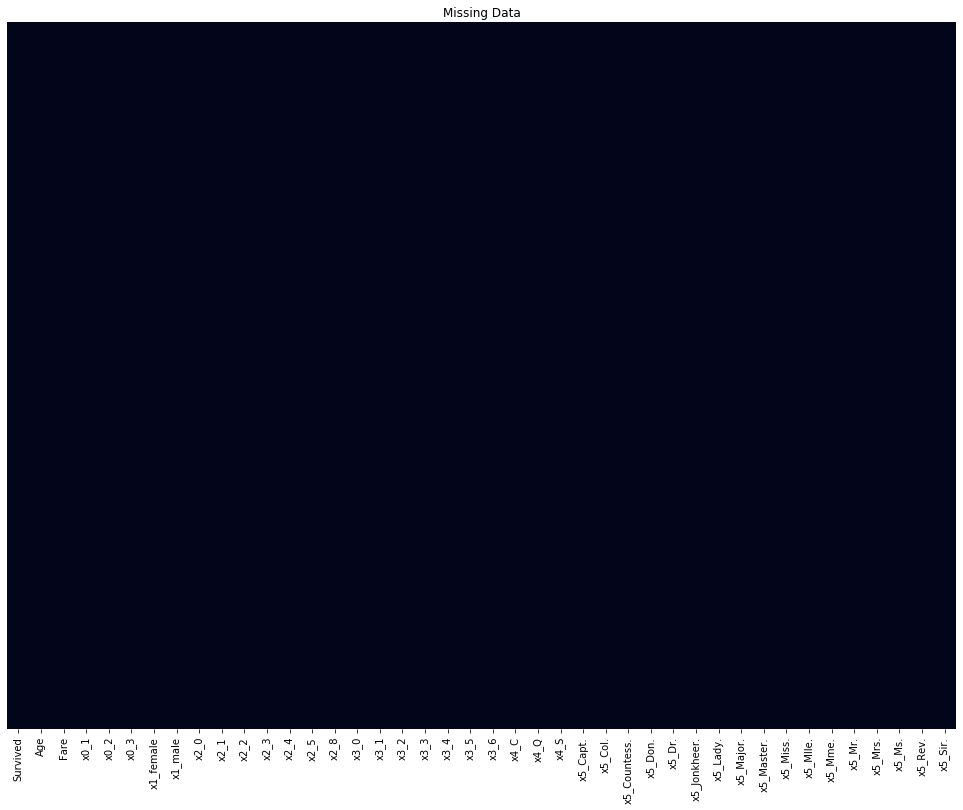

In [106]:
plt.figure(figsize=(17,13))
ax3 = sns.heatmap(df.isna(),cbar=False);
ax3.set_yticks([]);
ax3.set_title('Missing Data');

In [126]:
df.index.array

<PandasArray>
[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
 ...
 881, 882, 883, 884, 885, 886, 887, 888, 889, 890]
Length: 891, dtype: int64

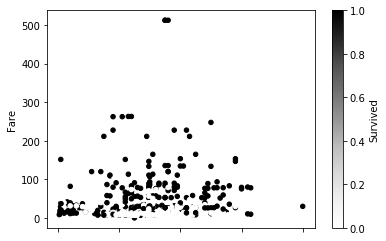

In [123]:
df.plot.scatter(x='Age', c='Survived', y='Fare')

In [107]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [109]:
from sklearn.linear_model import LogisticRegression

In [111]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
logreg.score(x_test,y_test)

0.7947761194029851

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
logreg = LogisticRegression()
params = {'penalty':['l1','l2'],'max_iter':[100,200,300,400],'solver':['warn','liblinear','saga']}


grid = GridSearchCV(logreg,param_grid=params,cv=5)
grid.fit(x,y)

C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\mm\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['warn', 'liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l2', 'solver': 'warn'}

In [116]:
grid.best_score_

0.8170594837261503

In [155]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Owen Harris Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,William Henry Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,Juozas Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,Margaret Edith Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,"Catherine Helen ""Carrie"" Johnston"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,Karl Howell Behr


In [182]:
df.Pclass.corr(df.Fare)

-0.5494996199439078

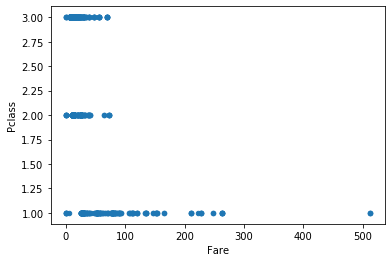

In [184]:
df.plot.scatter(x='Fare', y='Pclass')

In [196]:
df[(df.Age < df.Age.mean()) & (df.Survived == 1) & (df.Sex == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Laina Heikkinen
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.,Elisabeth Vilhelmina Berg
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.,Adele Achem
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss.,Marguerite Rut Sandstrom
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss.,"Anna ""Annie"" McGowan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Miss.,Asuncion Duran y More
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Mrs.,Hannah Wizosky
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Miss.,"Adele Kiamie ""Jane"" Najib"
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Mrs.,Imanita Parrish Hall
